In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class SimpleRidge:
    def __init__(self,alpha=1.0):
        self.alpha=alpha
        self.weights=None
        
    def fit(self,X,y):
        """
        Fit ridge using the normal equation
        w = (X^T X + αI)^(-1) X^T y
        """
        XtX=X.T @ X
        I=np.eye(X.shape[1])
        XtX_reg=XtX+self.alpha*I
        Xty=X.T @y
        
        self.weights=np.linalg.solve(XtX_reg,Xty)
        return self
    
    def predict(self,X):
        return X @ self.weights
    
        
        

In [4]:
def demo():
    print("RIDGE REGRESSION")
    
    np.random.seed(42)
    X = np.array([
        [1.0, 5],   # 1000 sqft, 5 years old
        [1.5, 10],  # 1500 sqft, 10 years old  
        [2.0, 3],   # 2000 sqft, 3 years old
        [2.5, 15],  # 2500 sqft, 15 years old
        [3.0, 8],   # 3000 sqft, 8 years old
        [1.2, 20],  # 1200 sqft, 20 years old
        [2.8, 2],   # 2800 sqft, 2 years old
        [1.8, 12]   # 1800 sqft, 12 years old
    ])
    true_weights = np.array([100, -2])  # $100k per 1000sqft, -$2k per year
    y = X @ true_weights + np.random.normal(0, 5, 8)  # Add some noise
    
    print("Dataset: Predicting House Prices")
    print("Features: [Size (1000 sqft), Age (years)]")
    print("Target: Price ($100k)")
    print(f"True relationship: Price = 100*Size - 2*Age")
    print(f"True weights: {true_weights}")
    print()
    
    # Test different regularization strengths
    alphas = [0, 1, 10]
    
    print("Results for different regularization strengths:")
    print("Alpha\tWeights\t\t\tMeaning")
    print("-" * 60)
    
    for alpha in alphas:
        ridge = SimpleRidge(alpha=alpha)
        ridge.fit(X, y)
        
        size_coef = ridge.weights[0]
        age_coef = ridge.weights[1]
        
        print(f"{alpha}\t[{size_coef:.1f}, {age_coef:.1f}]\t\t"
              f"${size_coef:.0f}k per 1000sqft, ${age_coef:.0f}k per year")
    
    print("\nObservation:")
    print("- Alpha=0: No regularization (standard linear regression)")
    print("- Alpha>0: Weights shrink toward zero")
    print("- Higher alpha: More shrinkage, simpler model")

if __name__ == "__main__":
    demo()
    
    

RIDGE REGRESSION
Dataset: Predicting House Prices
Features: [Size (1000 sqft), Age (years)]
Target: Price ($100k)
True relationship: Price = 100*Size - 2*Age
True weights: [100  -2]

Results for different regularization strengths:
Alpha	Weights			Meaning
------------------------------------------------------------
0	[101.9, -2.1]		$102k per 1000sqft, $-2k per year
1	[95.6, -1.2]		$96k per 1000sqft, $-1k per year
10	[61.7, 3.6]		$62k per 1000sqft, $4k per year

Observation:
- Alpha=0: No regularization (standard linear regression)
- Alpha>0: Weights shrink toward zero
- Higher alpha: More shrinkage, simpler model


In [ ]:
"""
J(w) = Σ_i (actual_i − predicted_i)^2 = ‖y − Xw‖² . -> OLS
∇J = −2 Xᵀ (y − Xw) . -> Differentiate using weight vector
−2 Xᵀ (y − Xw) = 0   ⟹   Xᵀ X w = Xᵀ y . -> Set the gradient to zero to locate the minimum

w = (Xᵀ X)⁻¹ Xᵀ y . -> the main equation.

This closed-form expression comes directly from differentiating the squared-error term (actual − predicted)^2 and gives the unique coefficient vector that minimises that loss.

"""

In [ ]:
"""So the “value” you choose (usually by cross-validation) is not a weight you’re trying to learn; it’s the hyper-parameter that controls how much regularisation you impose.

"""

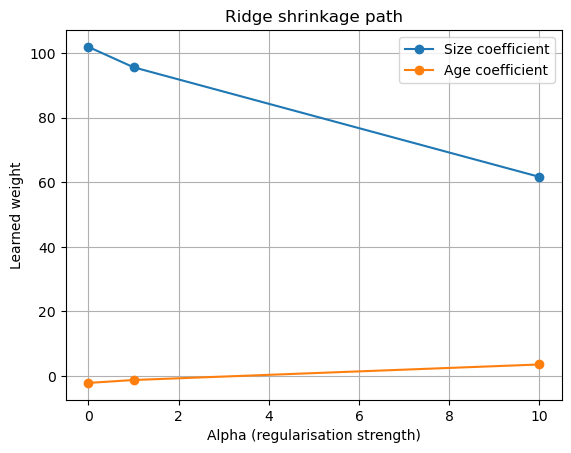

 larger α ⇒ simpler, less variable model at the cost of some bias


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- recreate the dataset used in the demo ---
np.random.seed(42)
X = np.array([
    [1.0,  5],
    [1.5, 10],
    [2.0,  3],
    [2.5, 15],
    [3.0,  8],
    [1.2, 20],
    [2.8,  2],
    [1.8, 12]
])
true_weights = np.array([100, -2])
y = X @ true_weights + np.random.normal(0, 5, 8)

# --- closed-form ridge solution ---
def ridge_weights(X, y, alpha):
    n_features = X.shape[1]
    A = X.T @ X + alpha * np.eye(n_features)
    b = X.T @ y
    return np.linalg.solve(A, b)

alphas = [0, 1, 10]
weights = np.array([ridge_weights(X, y, a) for a in alphas])  # shape (3, 2)

# --- plot: how each coefficient shrinks as alpha grows ---
plt.figure()
plt.plot(alphas, weights[:, 0], marker='o', label='Size coefficient')
plt.plot(alphas, weights[:, 1], marker='o', label='Age coefficient')
plt.xlabel('Alpha (regularisation strength)')
plt.ylabel('Learned weight')
plt.title('Ridge shrinkage path')
plt.legend()
plt.grid(True)
plt.show()
print(" larger α ⇒ simpler, less variable model at the cost of some bias,shrinking towards 0")

In [ ]:
"""
Correlated features	Simple “cov/var” double-counts shared information.	Still 
(𝑋𝑇𝑋)𝑤=𝑋𝑇𝑦
(XTX)w=Ty; the matrix algebra untangles the correlations.
"""

In [ ]:
# Feature Scaling (Standardization):

# Ridge regression works best if you scale your features (so all features have similar ranges).

# Use StandardScaler in sklearn to standardize your data before applying Ridge.

# Without scaling, one feature with larger values could dominate the penalty, making the optimization less effective.

In [ ]:
# During training, coefficients (
# 𝛽
# β) are updated using the gradient of the Ridge loss. The update formula includes both the fit to data and the penalty for big coefficients, ensuring that over time, the coefficients become smaller and the total loss is minimized.

In [ ]:
# Ridge regression reduces coefficients by adding λ to the denominator, making every coefficient smaller, which controls overfitting!